# maze solver
In this notebook I am going to take a maze picture with a start and a end point and I will try to solve the maze using python.

**note:** the maze picture must contain start and end points at the first or last line and not on the columns (as in the picture):

![](img.png)

### 1.1 importing important libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### 1.2 Getting the maze picture and converting it to matrix

In [2]:
def convertImgToMatrix(path): 
    mat = cv2.imread(path)
    n , m = mat.shape[0], mat.shape[1]
    maze_matrix = np.zeros(dtype=np.uint8, shape=(n,m))
    for i in range(n): 
        for j in range(m): 
            flag = False
            for k in range(3): 
                if(mat[i][j][k] < 255//2):
                    flag = True
            maze_matrix[i, j] = 1 if flag else 0
    return maze_matrix

### 1.3 find the start and end points
I defined the start and end as the middle of the white gap

The start and end can be in any place around the border

In [3]:
def findStartandEnd(mat: np.ndarray): 
    n, m = mat.shape
    points = []
    # first line
    i=0
    while(i < m):
        if mat[0][i] == 0: 
            s= i
            while(i < m and mat[0][i] == 0): 
                i = i+1
            points.append((s, i, 0))
        i+=1

    #last line:
    i=0
    while(i < m):
        if mat[n-1][i] == 0: 
            s= i
            while(i < m and mat[n-1][i] == 0): 
                i+=1
            points.append((s, i, n-1))
        i+=1
    
    return points

### 1.4 finding the path between the points

In [4]:
def find_path(mat, start, end):
    n, m = mat.shape
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)] # right, left, down, up
    queue = [(start, [start])]  # initialize queue with starting point and its path
    visited = set([start])
    front = 0
    
    while front < len(queue):
        point, path = queue[front]
        front += 1
        if point == end:
            return path  # return the path if end point is found
        
        for d in directions:
            next_point = (point[0]+d[0], point[1]+d[1])
            if 0 <= next_point[0] < n and 0 <= next_point[1] < m and mat[next_point[0]][next_point[1]] == 0 and next_point not in visited:
                queue.append((next_point, path + [next_point]))
                visited.add(next_point)
    
    return None

### 1.5 coloring the path

In [5]:
def color_path(mat, path): 
    for point in path: 
        i, j = point
        mat[i][j] = 2
        for k in range(-1, 2):
            for m in range(-1, 2):
                if i+k >= 0 and i+k < len(mat) and j+m >= 0 and j+m < len(mat[0]):
                    mat[i+k][j+m] = 2

### 1.6 changing the values and getting the final image

In [6]:
def convert_mat_to_image(mat): 
    n ,m  = mat.shape
    img = np.zeros(shape=(n, m, 3))
    for i in range(n): 
        for j in range(m): 
            if(mat[i][j] == 2): 
                img[i][j] = [255,0,0]
            elif(mat[i][j] ==0): 
                img[i][j] = [255, 255, 255]
    return img

### 1.7 combining all the functions and outputing the result:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


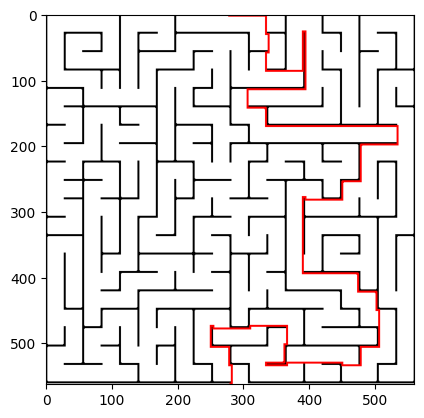

In [8]:
def solve_maze(image_name):
    image = convertImgToMatrix(image_name)
    points = findStartandEnd(image)
    start = (points[0][2], (points[0][0]+points[0][1])//2)
    end = (points[1][2], (points[1][0]+points[1][1])//2)
    path = find_path(image, start, end)
    color_path(image, path)
    image = convert_mat_to_image(image)
    plt.imshow(image)
    plt.show()

img_path = 'img.png'
solve_maze(img_path)